In [7]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [15]:
try:
    GIST = gpd.read_parquet("../../PHI_ETL/data/large_data/GIST_v0-1.parquet")
except:
    GIST = gpd.read_file("https://zenodo.org/record/6827729/files/GIST_v0-1.geojson?download=1", driver="GeoJSON")

In [16]:
GIST.shape

(217863, 29)

In [9]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")
Greece = gpd.read_file("../data/Greece_AL2.GeoJson", driver="GeoJSON") # borders of greek downloaded from https://www.kaggle.com/datasets/lsind18/greeceborders?resource=download
Asia_Minor = gpd.read_file("../data/PHI_asia-minor.geojson", driver="GeoJSON")

In [25]:
Greece_uu = Greece.unary_union

<AxesSubplot:>

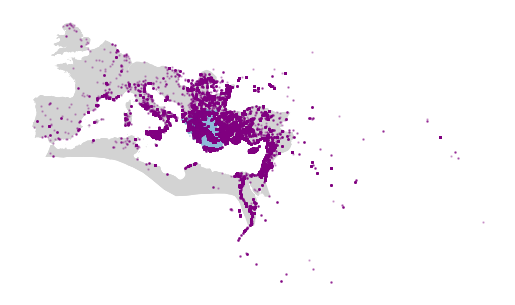

In [27]:
fig, ax = plt.subplots()
ax.axis("off")
pleiades_regions.plot(ax=ax, color="lightgrey")
Greece.plot(ax=ax, alpha=0.5)
GIST.plot(markersize=0.5, ax=ax, color="purple", alpha=0.3)
#Asia_Minor.plot(ax=ax, alpha=0.5)

In [18]:
GIST["gr"] = GIST.within(Greece)
GIST["gr"].sum()

/Users/kasev/Projects/EpiMR/epimr_venv/lib/python3.9/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


1

In [29]:
%%time
GIST["gr"] = GIST.within(Greece_uu)

CPU times: user 1min 34s, sys: 948 ms, total: 1min 35s
Wall time: 1min 35s


In [30]:
GIST["gr"].sum()

74940

In [ ]:
# a database of Greek poleis?